In [1]:
 # Бібліотеки для візуалізації
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import scipy
 

In [2]:
# Бібліотеки Pytorch
import torch 
import torchvision # тут лежить mnist, cifar та багато інших датасетів та трансформацій для картинок
import torch.nn as nn # тут лежать усі шари
import torch.utils.data as data # робота із завантажувачем даних
import torchvision.transforms as transforms
import torchvision.datasets as dsets #робота з класом Датасет
from torch.autograd import Variable # для автоматичного диференціатора

In [3]:
# Візуалізація графа
from torch.utils.tensorboard import SummaryWriter 
import datetime,os
import time
 
import seaborn as sns
sns.set_style('darkgrid')

## **Класифікуємо MNIST**

In [11]:
# задаємо параметри
inputSize = 784
numClasses = 10
numEpochs = 15
learningRate = 0.001 
hidden_1 = 500
hidden_2 = 250

In [12]:
root_directory = 'E:/Python/Lesson/lesson_all/lesson_54/'

In [13]:
# Завантажимо MNIST
batchSize = 100

# Навчальна вибірка
trainDataset = dsets.MNIST(root='E:/Python/Lesson/lesson_all/lesson_54/', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)
# Тестова вибірка
testDataset = dsets.MNIST(root='E:/Python/Lesson/lesson_all/lesson_54/', 
                           train=False, 
                           transform=transforms.ToTensor())

# Dataset Loader (підготовка даних для мережі)
trainLoader = torch.utils.data.DataLoader(dataset=trainDataset, # Який датасет
                                           batch_size=batchSize, # На скільки batch поділено
                                           shuffle=True) 

testLoader = torch.utils.data.DataLoader(dataset=testDataset, #  Який датасет
                                          batch_size=batchSize, # На скільки batch поділено
                                          shuffle=False)


In [14]:
# Подивимося на нашу вибірку
dataIter = iter(trainLoader) # Якою вибіркою пройдемося
trainX, trainY = next(dataIter) # Привласнюємо поточний batch

In [15]:
trainX.shape

torch.Size([100, 1, 28, 28])

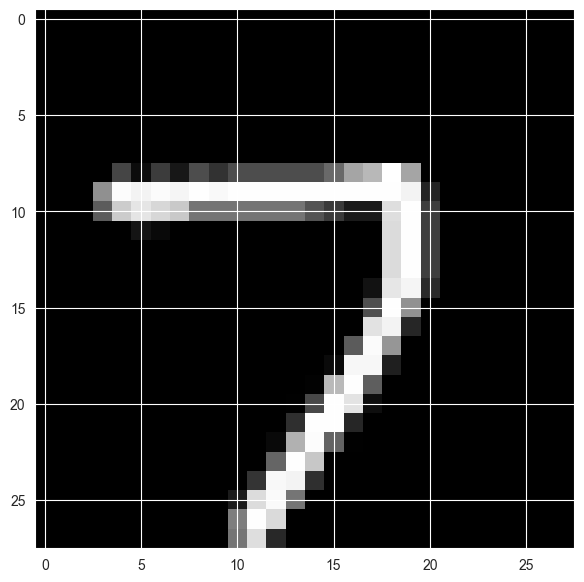

In [16]:
plt.figure(figsize=(14,7))
plt.imshow(trainX[1, 0], cmap='gray')
plt.show()

## Архітектура моделі

In [19]:
# Створюємо клас
class Classification(nn.Module):
    def __init__(self, input_size, hidden1, hidden2, num_classes):
        super().__init__() # успадковуємо всі властивості + додаємо своє
        self.layer1 = nn.Linear(input_size, hidden1)        
        self.layer2 = nn.Linear(hidden_1, hidden2)
        self.layer3 = nn.Linear(hidden_2, num_classes) 
        self.relu = nn.ReLU()       
        self.softmax = nn.Softmax(dim=1)
    # Задаємо принципи проходження даних через мережу    
    def forward(self, x):
        out = self.layer1(x) # вихід першого шару
        out = self.relu(out) # застосовуємо функцію активації до виходу першого шару
        out = self.layer2(out) # вихід другого шару
        out = self.relu(out) # застосовуємо функцію активації до виходу другого шару
        out = self.layer3(out) # вихід третього шару
        out = self.softmax(out) # застосовуємо функцію активації для третього шару
        
        return out 



In [20]:
model = Classification(inputSize, hidden_1, hidden_2, numClasses) # Створюємо об'єкт нашої повної мережі

In [21]:
trainX.view(-1, 28*28).shape # view операція ідентична reshape, за винятком, що вона змінює розмір масиву тільки для даної ітерації

torch.Size([100, 784])

In [22]:
trainX.size()

torch.Size([100, 1, 28, 28])

## Функція помилки та оптимізатор

In [23]:
criterion = nn.CrossEntropyLoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)  # оптимізатор
losses = [] # тут буде додаватись середня похибка. Список будемо використовувати для побудови графіка
model.train() # перехід у режим навчання (опціонально)

Classification(
  (layer1): Linear(in_features=784, out_features=500, bias=True)
  (layer2): Linear(in_features=500, out_features=250, bias=True)
  (layer3): Linear(in_features=250, out_features=10, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
)

## Навчаємо модель

Епоха: [1/15], Похибка: 2.2795
Епоха: [2/15], Похибка: 2.2553
Епоха: [3/15], Похибка: 2.1992
Епоха: [4/15], Похибка: 2.1528
Епоха: [5/15], Похибка: 2.0850
Епоха: [6/15], Похибка: 2.0018
Епоха: [7/15], Похибка: 1.8329
Епоха: [8/15], Похибка: 1.6773
Епоха: [9/15], Похибка: 1.4686
Епоха: [10/15], Похибка: 1.3462
Епоха: [11/15], Похибка: 1.0566
Епоха: [12/15], Похибка: 1.0154
Епоха: [13/15], Похибка: 0.9421
Епоха: [14/15], Похибка: 0.7303
Епоха: [15/15], Похибка: 0.7685


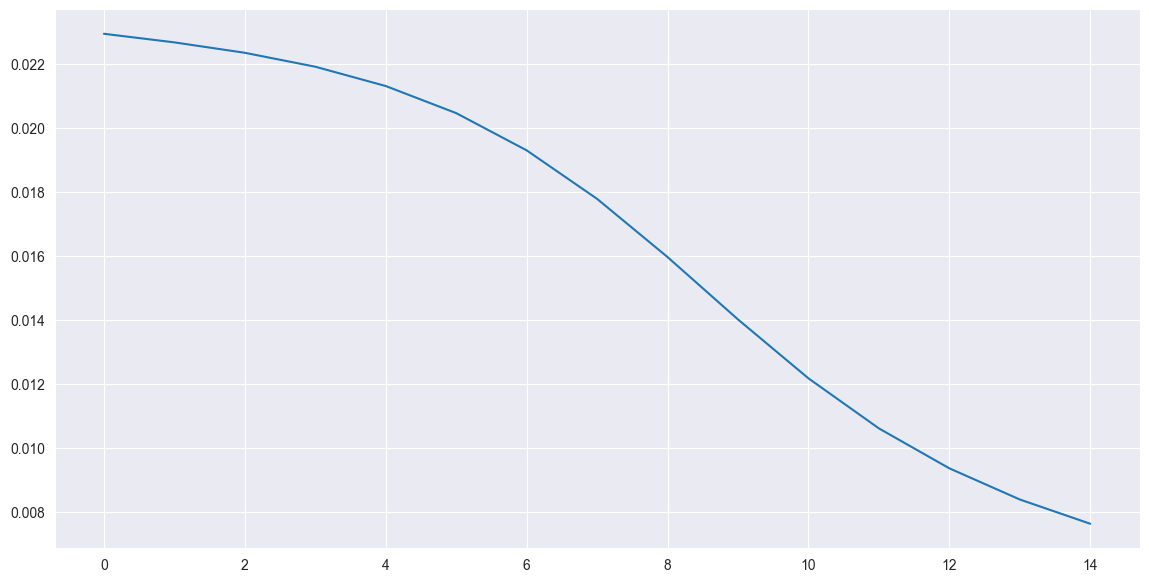

In [24]:
x = model(trainX[5].view(-1, 784)).detach()
print(x.data)
print(torch.max(x.data,dim=1)) # відповідь у вигляді ймовірностей

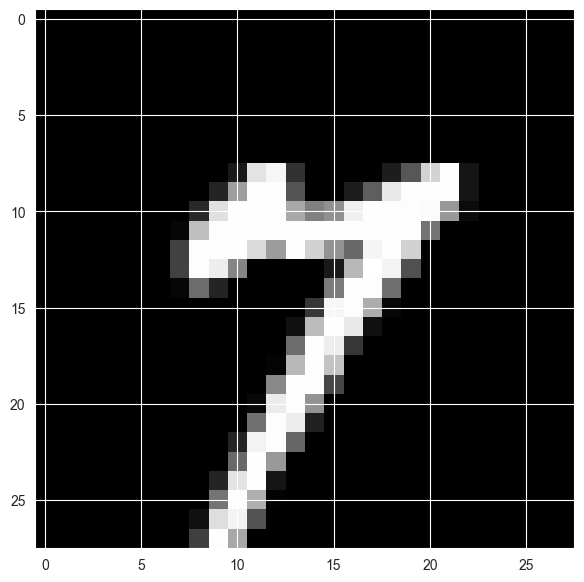

Правильна відповідь tensor(8)


In [25]:
plt.figure(figsize=(14,7))
plt.imshow(trainX[16, 0], cmap='gray')
plt.show()
print('Правильна відповідь', trainY[5])

In [26]:
x = model(trainX[5].view(-1, 784)).detach()
print(x.data)
print(torch.max(x.data,dim=1)) # відповідь у вигляді ймовірностей

tensor([[0.0094, 0.0252, 0.0802, 0.0911, 0.0070, 0.0820, 0.0051, 0.0099, 0.6788,
         0.0113]])
torch.return_types.max(
values=tensor([0.6788]),
indices=tensor([8]))


## Перевірка роботи моделі

In [27]:
correct = 0
total = 0

model.eval() # режим перевірки

for images, labels in testLoader: # ітеруємо по перевірочному датасету
    images = images.view(-1, 28*28) # наводимо до потрібного формату
    result = labels
    outputs = model(images) # робимо прогноз
    _, predicted = torch.max(outputs.data, 1) # _ максимальне значення пропускаємо, нас цікавить, що це за цифра
    total += labels.size(0) # 0 - перше/єдине значення
    correct += (predicted == labels).sum() 
    
print('Точність для 10000 картинок: %d %%' % (100 * correct // total))

Точність для 10000 картинок: 83 %


## Створення моделі_2

In [33]:
model_2 = Classification(inputSize, hidden_1, hidden_2, numClasses)
trainX.view(-1, 28*28).shape

torch.Size([100, 784])

### Функція помилки MSE та оптимізатор Adam

In [34]:
criterion = nn.MSELoss() 
optimizer = torch.optim.Adam(model_2.parameters(), lr=learningRate)  # оптимізатор
losses = [] # тут буде додаватись середня похибка. Список будемо використовувати для побудови графіка
model_2.train() # перехід у режим навчання (опціонально)

Classification(
  (layer1): Linear(in_features=784, out_features=500, bias=True)
  (layer2): Linear(in_features=500, out_features=250, bias=True)
  (layer3): Linear(in_features=250, out_features=10, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
)

### Навчаємо модель

E:\Python\venv\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([100, 1])) that is different to the input size (torch.Size([100, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Епоха: [1/15], Похибка: 27.0580
Епоха: [2/15], Похибка: 30.4700
Епоха: [3/15], Похибка: 32.5620
Епоха: [4/15], Похибка: 29.6180
Епоха: [5/15], Похибка: 26.8780
Епоха: [6/15], Похибка: 25.2220
Епоха: [7/15], Похибка: 25.2140
Епоха: [8/15], Похибка: 28.2100
Епоха: [9/15], Похибка: 29.2820
Епоха: [10/15], Похибка: 25.6660
Епоха: [11/15], Похибка: 28.2700
Епоха: [12/15], Похибка: 28.4900
Епоха: [13/15], Похибка: 28.3460
Епоха: [14/15], Похибка: 24.0780
Епоха: [15/15], Похибка: 27.3700


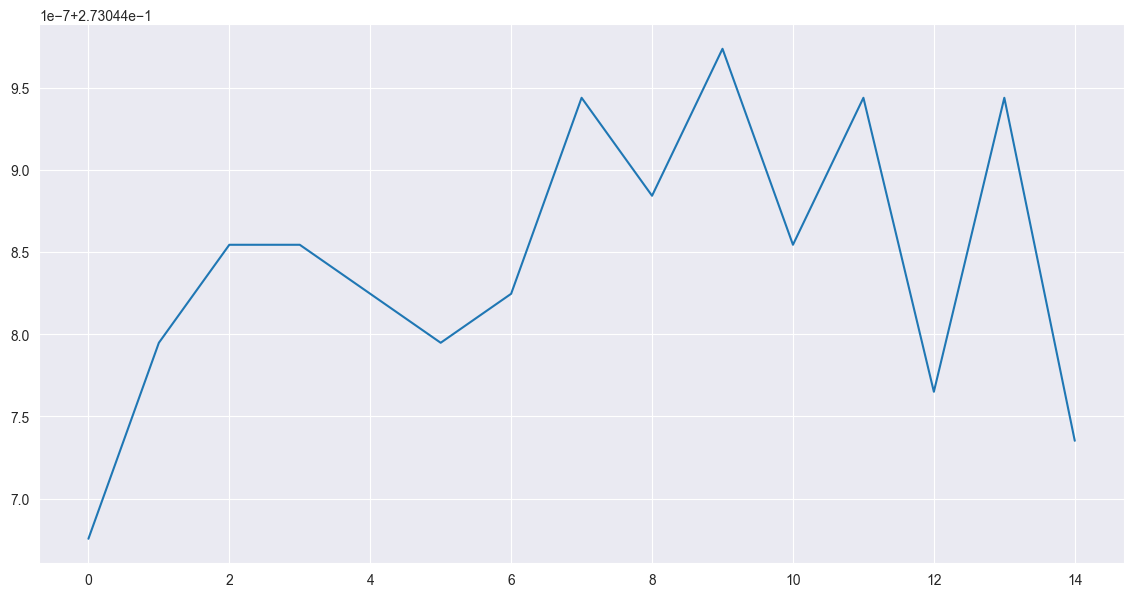

In [36]:
for epoch in range(numEpochs): # кількість епох
    lossTot = 0 # втрати в сукупності

    for i, (images, labels) in enumerate(trainLoader): # проходимося за всіма даними в batch
        images = images.view(-1, 28*28) # наводимо до правильного формату для сітки
        optimizer.zero_grad() # обнулюємо градієнт
        outputs = model_2(images) # тут наше передбачення
        loss = criterion(outputs, labels.view(-1,1).float()) # рахуємо похибку 
        loss.backward()  # зворотне поширення. 
                         # x.grad += dloss/dx для всіх параметрів x

        lossTot +=loss.detach().data # інкремент помилки
        
        optimizer.step() # наступний крок спуску

    losses.append(lossTot/len(trainDataset)) # обчислюємо середню помилку та додаємо до списку
    print('Епоха: [%d/%d], Похибка: %.4f' 
           % (epoch+1, numEpochs, loss))
plt.figure(figsize=(14,7))
plt.plot(losses) # Графік нашого навчання
plt.show()

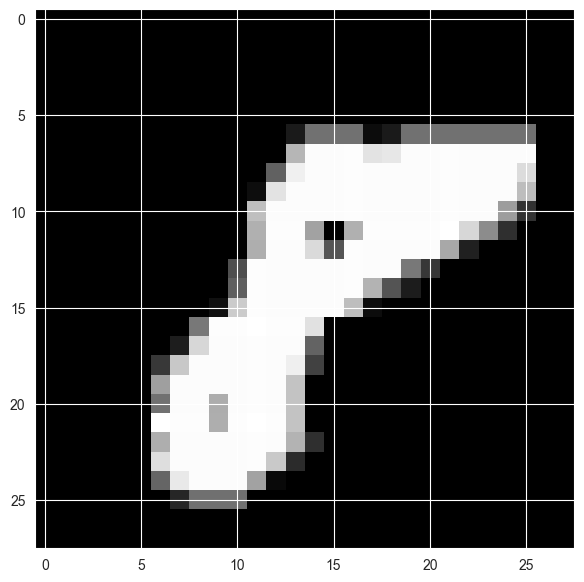

Правильна відповідь tensor(8)


In [37]:
plt.figure(figsize=(14,7))
plt.imshow(trainX[5, 0], cmap='gray')
plt.show()
print('Правильна відповідь', trainY[5])

In [41]:
x = model_2(trainX[5].view(-1, 784)).detach()
print(x.data)
print(torch.max(x.data,dim=1)) # відповідь у вигляді ймовірностей

tensor([[0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
         0.1000]])
torch.return_types.max(
values=tensor([0.1000]),
indices=tensor([7]))


### Перевірка роботи моделі

In [42]:
correct = 0
total = 0

model_2.eval() # режим перевірки

for images, labels in testLoader: # ітеруємо по перевірочному датасету
    images = images.view(-1, 28*28) # наводимо до потрібного формату
    result = labels
    outputs = model_2(images) # робимо прогноз
    _, predicted = torch.max(outputs.data, 1) # _ максимальне значення пропускаємо, нас цікавить, що це за цифра
    total += labels.size(0) # 0 - перше/єдине значення
    correct += (predicted == labels).sum() 
    
print('Точність для 10000 картинок: %d %%' % (100 * correct // total))

Точність для 10000 картинок: 11 %


## *Висновок: модель, навчена за допомогою Cross Entropy Loss показала значно вищу точності (83%) порівняно з моделлю, навченою з MSE Loss (11%). Зазначене свідчить про те, що модель, навчена за допомогою Cross Entropy Loss, набагато краще виконує завдання класифікації.*